<a href="https://colab.research.google.com/github/bishwa79/ml_algos/blob/main/Etoiles_la_nuit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json

In [ ]:
#Load json data from file 2
with open('/content/-8-26-23- Etoiles - la nuit de la culture vraiment la nuit en fait - Chat.json', 'r') as file2:
  data2 = json.load(file2)

Exploratory Data Analysis on title Etoiles - la nuit de la culture vraiment la nuit en fait

In [ ]:
# Printing basic structure
print("FileInfo:", data2.get("FileInfo"))
print("Streamer:", data2.get("streamer"))
print("Video:", data2.get("video"))
print("Comments:", data2.get("comments"))

FileInfo: {'Version': {'Major': 1, 'Minor': 3, 'Patch': 1}, 'CreatedAt': '2023-08-27T14:38:16.4903184+02:00', 'UpdatedAt': '0001-01-01T00:00:00'}
Streamer: {'name': 'Etoiles', 'id': 85800130}
Video: {'title': 'la nuit de la culture vraiment la nuit en fait', 'id': '1909370825', 'created_at': '2023-08-26T20:56:49Z', 'start': 0, 'end': 17785, 'length': 17785, 'viewCount': 195151, 'game': 'Just Chatting', 'chapters': [{'id': '72e742155605a3cb72f5921dca64d662', 'startMilliseconds': 0, 'lengthMilliseconds': 9673000, 'type': 'GAME_CHANGE', 'description': 'Just Chatting', 'subDescription': '', 'thumbnailUrl': '', 'gameId': '509658', 'gameDisplayName': 'Just Chatting', 'gameBoxArtUrl': 'https://static-cdn.jtvnw.net/ttv-boxart/509658-40x53.jpg'}, {'id': '728d1aa0caba22a63730d5ac0cd85d3e', 'startMilliseconds': 9673000, 'lengthMilliseconds': 8112000, 'type': 'GAME_CHANGE', 'description': 'Trackmania', 'subDescription': '', 'thumbnailUrl': '', 'gameId': '687129551', 'gameDisplayName': 'Trackmania'

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import pandas as pd

In [ ]:
comment_times = [comment['created_at'] for comment in data2.get("comments")]

In [ ]:
# Convert to datetime objects
comment_times = [
    datetime.strptime(time, '%Y-%m-%dT%H:%M:%S.%fZ') if '.' in time else datetime.strptime(time, '%Y-%m-%dT%H:%M:%SZ')
    for time in comment_times
]

In [ ]:
# Create a Pandas DataFrame of comments
df = pd.DataFrame({'CommentTime': comment_times})

In [ ]:
df.head()

,CommentTime
0,2023-08-26 20:57:27.090
1,2023-08-26 20:57:27.182
2,2023-08-26 20:57:28.481
3,2023-08-26 20:57:28.574
4,2023-08-26 20:57:29.035


In [ ]:
df.count

<bound method DataFrame.count of                   CommentTime
0     2023-08-26 20:57:27.090
1     2023-08-26 20:57:27.182
2     2023-08-26 20:57:28.481
3     2023-08-26 20:57:28.574
4     2023-08-26 20:57:29.035
...                       ...
17888 2023-08-27 01:53:11.131
17889 2023-08-27 01:53:11.331
17890 2023-08-27 01:53:11.819
17891 2023-08-27 01:53:12.964
17892 2023-08-27 01:53:14.780

[17893 rows x 1 columns]>

In [ ]:
df['CommentInterval'] = pd.to_datetime(df['CommentTime'])

In [ ]:
df.set_index('CommentTime', inplace=True)

In [ ]:
df

,CommentInterval
CommentTime,
2023-08-26 20:57:27.090,2023-08-26 20:57:27.090
2023-08-26 20:57:27.182,2023-08-26 20:57:27.182
2023-08-26 20:57:28.481,2023-08-26 20:57:28.481
2023-08-26 20:57:28.574,2023-08-26 20:57:28.574
2023-08-26 20:57:29.035,2023-08-26 20:57:29.035
...,...
2023-08-27 01:53:11.131,2023-08-27 01:53:11.131
2023-08-27 01:53:11.331,2023-08-27 01:53:11.331
2023-08-27 01:53:11.819,2023-08-27 01:53:11.819


In [ ]:
# Resample data to 1-minute intervals and count the number of comments in each interval
df_resampled = df['CommentInterval'].resample('1T').count()

In [ ]:
print(df_resampled)

CommentTime
2023-08-26 20:57:00    64
2023-08-26 20:58:00    57
2023-08-26 20:59:00    75
2023-08-26 21:00:00    25
2023-08-26 21:01:00    39
                       ..
2023-08-27 01:49:00     7
2023-08-27 01:50:00     8
2023-08-27 01:51:00    30
2023-08-27 01:52:00    89
2023-08-27 01:53:00    22
Freq: T, Name: CommentInterval, Length: 297, dtype: int64


In [ ]:
print(df_resampled.idxmax())

2023-08-26 21:04:00


In [ ]:
print(df_resampled.values.max())

260


In [ ]:
df_resampled[0]

64

In [ ]:
df_resampled.shape

(297,)

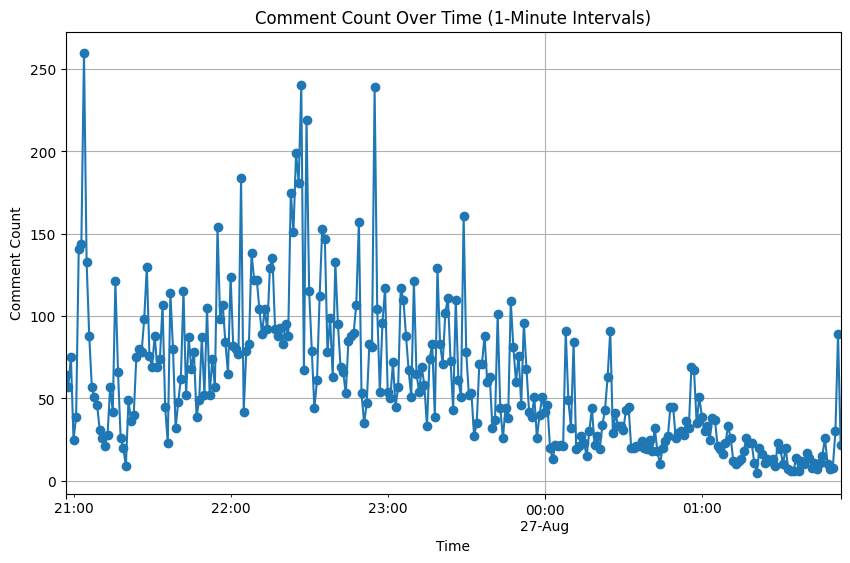

In [ ]:
import matplotlib.pyplot as plt

# Plot the resampled data
plt.figure(figsize=(10, 6))
df_resampled.plot(marker='o', linestyle='-')

plt.title('Comment Count Over Time (1-Minute Intervals)')
plt.xlabel('Time')
plt.ylabel('Comment Count')
plt.grid(True)
plt.show()

In [ ]:
# Extract video duration
video_duration = data2.get("video")['length']

In [ ]:
# Extract information about game changes from chapters
chapters = data2.get("video").get("chapters")

In [ ]:
video_start_time = datetime.strptime(data2["video"]["created_at"], '%Y-%m-%dT%H:%M:%SZ')

In [ ]:
# Extract video duration
video_duration = data2.get("video")['length']

In [ ]:
video_duration

17785

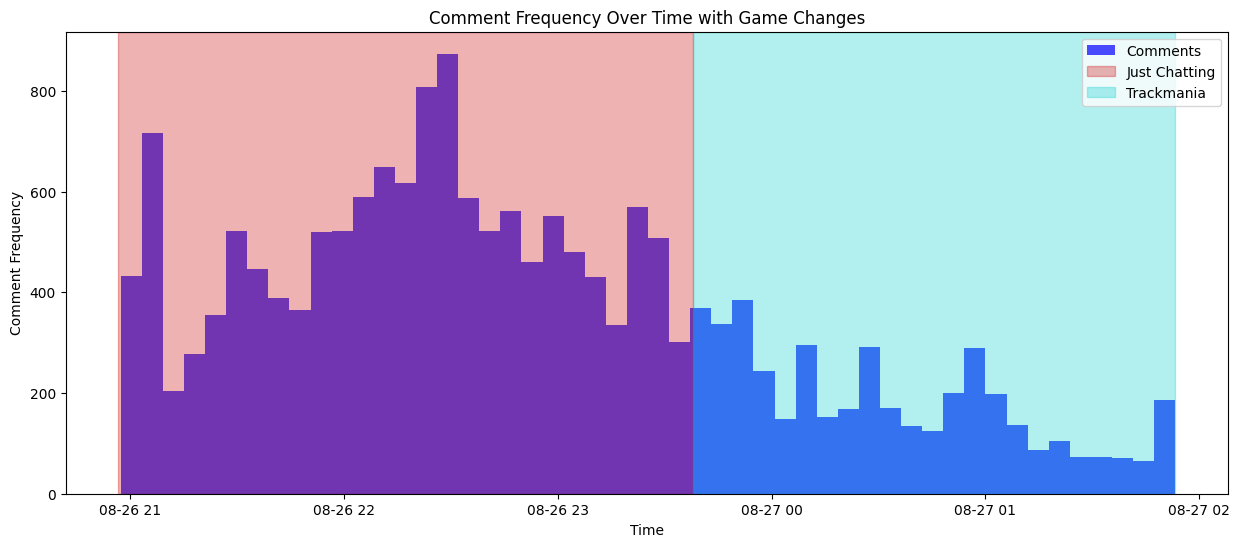

In [ ]:
# Create a figure and axis
from matplotlib.colors import hsv_to_rgb
game_colors = ['red', 'green', 'purple', 'orange']
fig, ax = plt.subplots(figsize=(15, 6))
plt.hist(comment_times, bins=50, color='blue', alpha=0.7, label='Comments')
for i, chapter in enumerate(chapters):
    start_time = video_start_time + timedelta(seconds=chapter["startMilliseconds"] / 1000)
    end_time =start_time +   timedelta(seconds=chapter["lengthMilliseconds"] / 1000)
    color = hsv_to_rgb([i / len(chapters), 1.0, 0.8])
    plt.axvspan(start_time, end_time, alpha=0.3, color=color, label=chapter['gameDisplayName'])
plt.xlabel('Time')
plt.ylabel('Comment Frequency')
plt.title('Comment Frequency Over Time with Game Changes')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
import pandas as pd
df_badge = pd.json_normalize(data2['comments'])

In [ ]:
df_badge

,_id,created_at,channel_id,content_type,content_id,content_offset_seconds,commenter.display_name,commenter._id,commenter.name,commenter.bio,commenter.created_at,commenter.updated_at,commenter.logo,message.body,message.bits_spent,message.fragments,message.user_badges,message.user_color,message.emoticons
0,f6618349-0cdf-4fd1-9b99-0b5bb6a3954c,2023-08-26T20:57:27.09Z,85800130,video,1909370825,37,c_amarante,659115224,c_amarante,None,2021-03-07T20:09:01.546893Z,2023-08-26T20:57:27.172165Z,https://static-cdn.jtvnw.net/user-default-pict...,Slttt,0,"[{'text': 'Slttt', 'emoticon': None}]",[],None,[]
1,2329a141-27a2-42db-9ddb-f0238101f1c9,2023-08-26T20:57:27.182Z,85800130,video,1909370825,37,neqti_,151573708,neqti_,:):,2017-03-26T19:28:27.466712Z,2023-08-26T19:21:32.074816Z,https://static-cdn.jtvnw.net/jtv_user_pictures...,YO,0,"[{'text': 'YO', 'emoticon': None}]",[],#FFFFFF,[]
2,55558563-f733-499a-a23f-7c665a1d4152,2023-08-26T20:57:28.481Z,85800130,video,1909370825,38,elgie_16,573125959,elgie_16,None,2020-08-26T10:28:28.43363Z,2023-08-27T11:19:37.985512Z,https://static-cdn.jtvnw.net/user-default-pict...,bonsoir btw,0,"[{'text': 'bonsoir btw', 'emoticon': None}]","[{'_id': 'premium', 'version': '1'}]",#00FF0B,[]
3,55196bf0-be48-4520-bf4e-1f531791dc7b,2023-08-26T20:57:28.574Z,85800130,video,1909370825,38,nasoube_,798149328,nasoube_,None,2022-05-29T18:03:53.249452Z,2023-08-25T21:41:47.602938Z,https://static-cdn.jtvnw.net/jtv_user_pictures...,LET'S GOOO,0,"[{'text': 'LET'S GOOO', 'emoticon': None}]",[],#DAA520,[]
4,452444e2-1263-4771-a003-263874b7f1d3,2023-08-26T20:57:29.035Z,85800130,video,1909370825,39,Getbanned_,99011794,getbanned_,None,2015-08-12T13:38:58.342464Z,2023-08-26T20:57:29.127255Z,https://static-cdn.jtvnw.net/jtv_user_pictures...,OMG JE BANDEEEEE,0,"[{'text': 'OMG JE BANDEEEEE', 'emoticon': None}]","[{'_id': 'subscriber', 'version': '0'}, {'_id'...",None,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17888,1d53c0ae-5fa8-46d5-9122-c9da1adf4455,2023-08-27T01:53:11.131Z,85800130,video,1909370825,17781,lenoobleplusfort,279279556,lenoobleplusfort,None,2018-11-29T17:53:11.613118Z,2023-08-13T15:30:31.303065Z,https://static-cdn.jtvnw.net/jtv_user_pictures...,"les gens qui attende le dokkan now, vous allez...",0,"[{'text': 'les gens qui attende le dokkan now,...",[],#FF4500,[]
17889,f94fecd1-8dc9-4861-b1bd-fe6e24bb0623,2023-08-27T01:53:11.331Z,85800130,video,1909370825,17781,sully_vannn,76943591,sully_vannn,ici on s'amuse comme des fous sur un stream qu...,2014-12-10T17:05:25.318753Z,2023-08-01T20:00:40.920187Z,https://static-cdn.jtvnw.net/jtv_user_pictures...,KEKW,0,"[{'text': 'KEKW', 'emoticon': None}]","[{'_id': 'subscriber', 'version': '0'}, {'_id'...",#008000,[]
17890,fe80d087-0968-4450-9e48-b586bea5471b,2023-08-27T01:53:11.819Z,85800130,video,1909370825,17782,espylce,144914795,espylce,None,2017-01-15T21:24:47.815751Z,2023-08-24T18:51:38.261471Z,https://static-cdn.jtvnw.net/user-default-pict...,Bonne nuit !,0,"[{'text': 'Bonne nuit !', 'emoticon': None}]",[],#008000,[]
17891,161f59e9-11a8-46ee-b9b9-ff02d4b022bb,2023-08-27T01:53:12.964Z,85800130,video,1909370825,17783,k_tchoo,169619045,k_tchoo,None,2017-08-12T23:23:31.681019Z,2023-08-27T09:15:22.61662Z,https://static-cdn.jtvnw.net/jtv_user_pictures...,BN ! Bisous à tous <3 <3 <3 <3,0,"[{'text': 'BN ! Bisous à tous ', 'emoticon': N...",[],#FF0000,"[{'_id': '555555584', 'begin': 20, 'end': 23},..."


In [ ]:
# Extract badge information
df_badge['badge_type'] = df_badge['message.user_badges'].apply(lambda x: x[0]['_id'] if x else 'None')

In [ ]:
df_badge['badge_type']

0              None
1              None
2           premium
3              None
4        subscriber
            ...    
17888          None
17889    subscriber
17890          None
17891          None
17892          None
Name: badge_type, Length: 17893, dtype: object

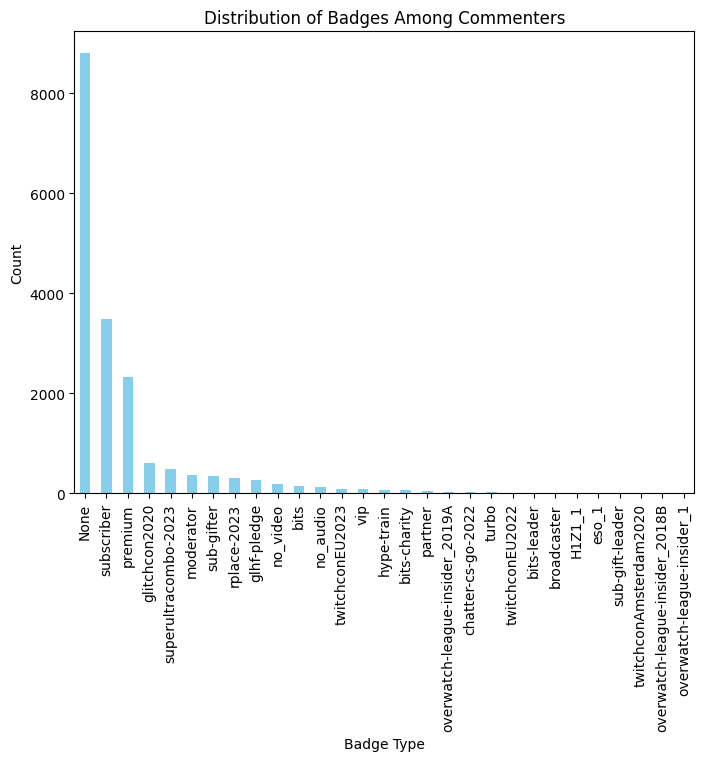

In [ ]:
# Plot a bar chart or pie chart to visualize the proportion of different badges
badge_counts = df_badge['badge_type'].value_counts()
plt.figure(figsize=(8, 6))
badge_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Badges Among Commenters')
plt.xlabel('Badge Type')
plt.ylabel('Count')
plt.show()

In [ ]:
df_resampled_new = df_resampled.to_frame()

In [ ]:
# Identify periods with unusually high comment frequency (e.g., peaks)

high_comment_periods = df_resampled_new[df_resampled_new.values > 100]

In [ ]:
high_comment_periods

,CommentInterval
CommentTime,
2023-08-26 21:02:00,141
2023-08-26 21:03:00,144
2023-08-26 21:04:00,260
2023-08-26 21:05:00,133
2023-08-26 21:16:00,121
2023-08-26 21:28:00,130
2023-08-26 21:34:00,107
2023-08-26 21:37:00,114
2023-08-26 21:42:00,115


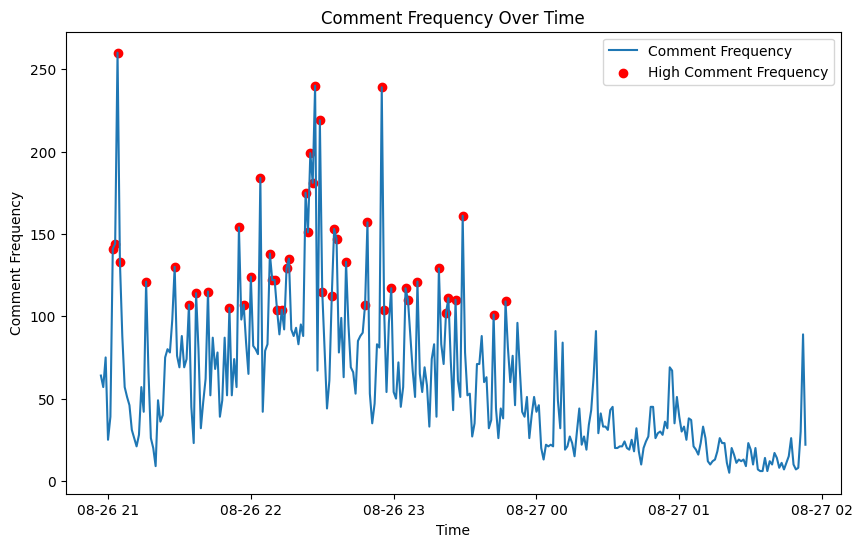

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_resampled_new.index, df_resampled_new.values, label='Comment Frequency')
plt.scatter(high_comment_periods.index, high_comment_periods.values, color='red', label='High Comment Frequency')
plt.title('Comment Frequency Over Time')
plt.xlabel('Time')
plt.ylabel('Comment Frequency')
plt.legend()
plt.show()

In [ ]:
from wordcloud import WordCloud

In [ ]:
# Concatenate all comments into a single string
all_comments = ' '.join(df_badge['message.body'])

In [ ]:
all_comments

'Slttt YO bonsoir btw LET\'S GOOO OMG JE BANDEEEEE Bonsoir tout le monde !!! Bonsoir ! ta reussi youpi Holaaa yeeeeea OEEEEEEE etoilesTeam etoilesTeam quel bonheur- Yooooooooooooo yo La connexion rétablit mdrrr OMG LA LEGENDE WOUHOUUUUUUU bonsoir OMG ????????? Helloooo la journée est pas foutue finalement Bonsoir PokPikachu coucou OI HeyGuys oeeeeeeeee Bonsoir Oh la légende YAY ON A GAGNE LA CITE Omgggg kudryiavka_ subscribed with Prime. They\'ve subscribed for 16 months!  Hii <3 YOUPIIIII Je guéris de la dépression grace à Payou Salut les gens Il l\'a fait LEZGOOO Let’s go Pile a la fin de mon cardio Je rentre de rave. Je suis explosée C\'est la culture etoilesTeam etoilesTeam etoilesTeam SSSSSAAAAAAALLLLLLLLLUUUUUUUUUUTTTTTTTAAAAATTTTTTTTIIIIIIIIIIIIIIIOOOOOOOOOOOONNNNNNNNNN !!!!!! No connexion ? cet HOMME REFAIT ABSOLUMENT MA SOIRée Bonjour!! Bonsoir etoilesL etoilesL etoilesL Yooo LET\'S GOO GG OH LE GOAT oh la la le sauveur nocturne super ta regler ton internet !! 3h de retard 🤣🤣 

In [ ]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

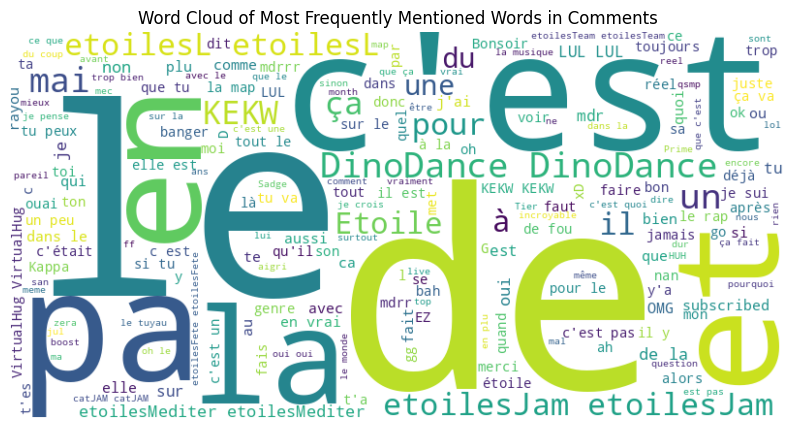

In [ ]:
# Plot the Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequently Mentioned Words in Comments')
plt.show()

Most frequent word Analyse the most used word in segment that contain high comment frequency

In [ ]:
# Creating a DataFrame from the JSON data
df_word = pd.json_normalize(data2["comments"])

In [ ]:
# Convering the 'created_at' column to datetime format
df_word['created_at'] = pd.to_datetime(df_word['created_at'])

In [ ]:
# Set 'created_at' as the index for time-based analysis
df_word.set_index('created_at', inplace=True)

In [ ]:
df_word

,_id,channel_id,content_type,content_id,content_offset_seconds,commenter.display_name,commenter._id,commenter.name,commenter.bio,commenter.created_at,commenter.updated_at,commenter.logo,message.body,message.bits_spent,message.fragments,message.user_badges,message.user_color,message.emoticons
created_at,,,,,,,,,,,,,,,,,,
2023-08-26 20:57:27.090000+00:00,f6618349-0cdf-4fd1-9b99-0b5bb6a3954c,85800130,video,1909370825,37,c_amarante,659115224,c_amarante,None,2021-03-07T20:09:01.546893Z,2023-08-26T20:57:27.172165Z,https://static-cdn.jtvnw.net/user-default-pict...,Slttt,0,"[{'text': 'Slttt', 'emoticon': None}]",[],None,[]
2023-08-26 20:57:27.182000+00:00,2329a141-27a2-42db-9ddb-f0238101f1c9,85800130,video,1909370825,37,neqti_,151573708,neqti_,:):,2017-03-26T19:28:27.466712Z,2023-08-26T19:21:32.074816Z,https://static-cdn.jtvnw.net/jtv_user_pictures...,YO,0,"[{'text': 'YO', 'emoticon': None}]",[],#FFFFFF,[]
2023-08-26 20:57:28.481000+00:00,55558563-f733-499a-a23f-7c665a1d4152,85800130,video,1909370825,38,elgie_16,573125959,elgie_16,None,2020-08-26T10:28:28.43363Z,2023-08-27T11:19:37.985512Z,https://static-cdn.jtvnw.net/user-default-pict...,bonsoir btw,0,"[{'text': 'bonsoir btw', 'emoticon': None}]","[{'_id': 'premium', 'version': '1'}]",#00FF0B,[]
2023-08-26 20:57:28.574000+00:00,55196bf0-be48-4520-bf4e-1f531791dc7b,85800130,video,1909370825,38,nasoube_,798149328,nasoube_,None,2022-05-29T18:03:53.249452Z,2023-08-25T21:41:47.602938Z,https://static-cdn.jtvnw.net/jtv_user_pictures...,LET'S GOOO,0,"[{'text': 'LET'S GOOO', 'emoticon': None}]",[],#DAA520,[]
2023-08-26 20:57:29.035000+00:00,452444e2-1263-4771-a003-263874b7f1d3,85800130,video,1909370825,39,Getbanned_,99011794,getbanned_,None,2015-08-12T13:38:58.342464Z,2023-08-26T20:57:29.127255Z,https://static-cdn.jtvnw.net/jtv_user_pictures...,OMG JE BANDEEEEE,0,"[{'text': 'OMG JE BANDEEEEE', 'emoticon': None}]","[{'_id': 'subscriber', 'version': '0'}, {'_id'...",None,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-27 01:53:11.131000+00:00,1d53c0ae-5fa8-46d5-9122-c9da1adf4455,85800130,video,1909370825,17781,lenoobleplusfort,279279556,lenoobleplusfort,None,2018-11-29T17:53:11.613118Z,2023-08-13T15:30:31.303065Z,https://static-cdn.jtvnw.net/jtv_user_pictures...,"les gens qui attende le dokkan now, vous allez...",0,"[{'text': 'les gens qui attende le dokkan now,...",[],#FF4500,[]
2023-08-27 01:53:11.331000+00:00,f94fecd1-8dc9-4861-b1bd-fe6e24bb0623,85800130,video,1909370825,17781,sully_vannn,76943591,sully_vannn,ici on s'amuse comme des fous sur un stream qu...,2014-12-10T17:05:25.318753Z,2023-08-01T20:00:40.920187Z,https://static-cdn.jtvnw.net/jtv_user_pictures...,KEKW,0,"[{'text': 'KEKW', 'emoticon': None}]","[{'_id': 'subscriber', 'version': '0'}, {'_id'...",#008000,[]
2023-08-27 01:53:11.819000+00:00,fe80d087-0968-4450-9e48-b586bea5471b,85800130,video,1909370825,17782,espylce,144914795,espylce,None,2017-01-15T21:24:47.815751Z,2023-08-24T18:51:38.261471Z,https://static-cdn.jtvnw.net/user-default-pict...,Bonne nuit !,0,"[{'text': 'Bonne nuit !', 'emoticon': None}]",[],#008000,[]


In [ ]:
# Resampling data to identify activity peaks (e.g., 1-minute intervals)
df_resampled_new = df_word.resample('1T').size()

In [ ]:
df_resampled_new

created_at
2023-08-26 20:57:00+00:00    64
2023-08-26 20:58:00+00:00    57
2023-08-26 20:59:00+00:00    75
2023-08-26 21:00:00+00:00    25
2023-08-26 21:01:00+00:00    39
                             ..
2023-08-27 01:49:00+00:00     7
2023-08-27 01:50:00+00:00     8
2023-08-27 01:51:00+00:00    30
2023-08-27 01:52:00+00:00    89
2023-08-27 01:53:00+00:00    22
Freq: T, Length: 297, dtype: int64

In [ ]:
df_resampled_new.values.max()

260

In [ ]:
df_resampled_new.values.mean()

60.245791245791246

In [ ]:
high_frequency_comments = df_word[df_word.index.floor("T").isin(df_resampled_new[df_resampled_new >= 60].index)]

In [ ]:
high_frequency_comments

,_id,channel_id,content_type,content_id,content_offset_seconds,commenter.display_name,commenter._id,commenter.name,commenter.bio,commenter.created_at,commenter.updated_at,commenter.logo,message.body,message.bits_spent,message.fragments,message.user_badges,message.user_color,message.emoticons
created_at,,,,,,,,,,,,,,,,,,
2023-08-26 20:57:27.090000+00:00,f6618349-0cdf-4fd1-9b99-0b5bb6a3954c,85800130,video,1909370825,37,c_amarante,659115224,c_amarante,None,2021-03-07T20:09:01.546893Z,2023-08-26T20:57:27.172165Z,https://static-cdn.jtvnw.net/user-default-pict...,Slttt,0,"[{'text': 'Slttt', 'emoticon': None}]",[],None,[]
2023-08-26 20:57:27.182000+00:00,2329a141-27a2-42db-9ddb-f0238101f1c9,85800130,video,1909370825,37,neqti_,151573708,neqti_,:):,2017-03-26T19:28:27.466712Z,2023-08-26T19:21:32.074816Z,https://static-cdn.jtvnw.net/jtv_user_pictures...,YO,0,"[{'text': 'YO', 'emoticon': None}]",[],#FFFFFF,[]
2023-08-26 20:57:28.481000+00:00,55558563-f733-499a-a23f-7c665a1d4152,85800130,video,1909370825,38,elgie_16,573125959,elgie_16,None,2020-08-26T10:28:28.43363Z,2023-08-27T11:19:37.985512Z,https://static-cdn.jtvnw.net/user-default-pict...,bonsoir btw,0,"[{'text': 'bonsoir btw', 'emoticon': None}]","[{'_id': 'premium', 'version': '1'}]",#00FF0B,[]
2023-08-26 20:57:28.574000+00:00,55196bf0-be48-4520-bf4e-1f531791dc7b,85800130,video,1909370825,38,nasoube_,798149328,nasoube_,None,2022-05-29T18:03:53.249452Z,2023-08-25T21:41:47.602938Z,https://static-cdn.jtvnw.net/jtv_user_pictures...,LET'S GOOO,0,"[{'text': 'LET'S GOOO', 'emoticon': None}]",[],#DAA520,[]
2023-08-26 20:57:29.035000+00:00,452444e2-1263-4771-a003-263874b7f1d3,85800130,video,1909370825,39,Getbanned_,99011794,getbanned_,None,2015-08-12T13:38:58.342464Z,2023-08-26T20:57:29.127255Z,https://static-cdn.jtvnw.net/jtv_user_pictures...,OMG JE BANDEEEEE,0,"[{'text': 'OMG JE BANDEEEEE', 'emoticon': None}]","[{'_id': 'subscriber', 'version': '0'}, {'_id'...",None,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-27 01:52:57.186000+00:00,0a49eb5b-3c75-4c51-870b-7146cdebe4ea,85800130,video,1909370825,17767,PavelArkh,104462326,pavelarkh,,2015-10-16T01:03:31.094409Z,2023-08-14T21:04:30.162194Z,https://static-cdn.jtvnw.net/jtv_user_pictures...,MET TOI GUCCI,0,"[{'text': 'MET TOI GUCCI', 'emoticon': None}]","[{'_id': 'superultracombo-2023', 'version': '1'}]",#FF0000,[]
2023-08-27 01:52:57.326000+00:00,bf7916ff-0955-4e4d-9fc4-60583df0aa83,85800130,video,1909370825,17767,poumondeplatine,456377699,poumondeplatine,métaux précieux sous mon poitrail,2019-08-22T08:11:55.218138Z,2023-08-27T00:32:50.393141Z,https://static-cdn.jtvnw.net/jtv_user_pictures...,bonne nuit,0,"[{'text': 'bonne nuit', 'emoticon': None}]",[],#008000,[]
2023-08-27 01:52:59.282000+00:00,6bc639ca-6010-4a8c-8be9-8002fb67f65b,85800130,video,1909370825,17769,Akeri0n,170668656,akeri0n,"Y'a r, c'est moi.",2017-08-20T10:49:57.382013Z,2023-08-20T23:55:18.786521Z,https://static-cdn.jtvnw.net/jtv_user_pictures...,@lesaumonparfait Bn a toi etoilesL,0,"[{'text': '@lesaumonparfait Bn a toi ', 'emoti...","[{'_id': 'subscriber', 'version': '6'}, {'_id'...",#00FF7F,"[{'_id': '302289807', 'begin': 26, 'end': 35}]"


In [ ]:
# Tokenize comments into words
all_words = " ".join(high_frequency_comments["message.body"]).split()

In [ ]:
# Convert to lowercase
all_words = [word.lower() for word in all_words]

In [ ]:
import string
from nltk.corpus import stopwords
from collections import Counter

In [ ]:
# Remove punctuation
all_words = [word.translate(str.maketrans("", "", string.punctuation)) for word in all_words]

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Remove stop words
stop_words = set(stopwords.words("french"))
all_words = [word for word in all_words if word not in stop_words]

In [ ]:
type(all_words)

list

In [ ]:
# Count occurrences of each word
word_counts = Counter(all_words)

In [ ]:
# Find the most common 100 words
most_common_words = word_counts.most_common(100)

In [ ]:
print("Most Common 100 Words in High-Frequency Comments :")
for word, count in most_common_words:
    print(f"{word}: {count} occurrences")

Most Common 100 Words in High-Frequency Comments :
: 1964 occurrences
3: 870 occurrences
cest: 843 occurrences
kekw: 633 occurrences
a: 559 occurrences
lul: 538 occurrences
dinodance: 531 occurrences
ça: 461 occurrences
etoilesl: 442 occurrences
etoilesjam: 441 occurrences
etoilesmediter: 344 occurrences
oui: 310 occurrences
bien: 242 occurrences
trop: 239 occurrences
etoiles: 200 occurrences
non: 186 occurrences
fait: 179 occurrences
tout: 178 occurrences
plus: 175 occurrences
omg: 171 occurrences
va: 161 occurrences
jai: 155 occurrences
mdr: 151 occurrences
oh: 147 occurrences
si: 144 occurrences
aussi: 134 occurrences
comme: 132 occurrences
ca: 131 occurrences
quoi: 131 occurrences
quand: 129 occurrences
vrai: 129 occurrences
bon: 123 occurrences
rap: 115 occurrences
ah: 105 occurrences
catjam: 100 occurrences
mdrrr: 98 occurrences
1: 98 occurrences
rayou: 96 occurrences
ya: 95 occurrences
huh: 91 occurrences
faut: 91 occurrences
tas: 88 occurrences
2: 86 occurrences
fou: 85 occurre